# 기반 준비

## 모듈 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

## 속성 데이터 준비

### 데이터 다운로드

In [2]:
!wget https://github.com/dhrim/keras_howto_2021/raw/master/common/iris.csv

--2021-07-25 13:17:39--  https://github.com/dhrim/keras_howto_2021/raw/master/common/iris.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/common/iris.csv [following]
--2021-07-25 13:17:40--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/common/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris.csv.6’

iris.csv.6          100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-07-25 13:17:40 (7.64 MB/s) - ‘iris.csv.6’ saved [2218/2218]



In [3]:
!head iris.csv

septal_length,septal_width,petal_length,petal_width,class
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


### 데이터 로딩

In [4]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [5]:
iris_data = iris.to_numpy()
print(iris_data.shape)
print(iris_data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


### x, y 분리 전에 섞기

In [6]:
np.random.shuffle(iris_data)
print(iris_data[:5])

[[6.8 2.8 4.8 1.4 1. ]
 [4.6 3.4 1.4 0.3 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [6.3 2.7 4.9 1.8 2. ]
 [4.6 3.2 1.4 0.2 0. ]]


### x, y로 분리

In [7]:
iris_raw_x = iris_data[:,:4]
iris_raw_y = iris_data[:,4:]

In [8]:
print(iris_raw_x.shape)
print(iris_raw_y.shape)

(120, 4)
(120, 1)


In [9]:
print(iris_raw_x[:5])
print(iris_raw_y[:5])

[[6.8 2.8 4.8 1.4]
 [4.6 3.4 1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [6.3 2.7 4.9 1.8]
 [4.6 3.2 1.4 0.2]]
[[1.]
 [0.]
 [0.]
 [2.]
 [0.]]


# 속성 데이터

## 아무것도 적용 하지 않은

In [10]:
x = iris_raw_x
y = iris_raw_y

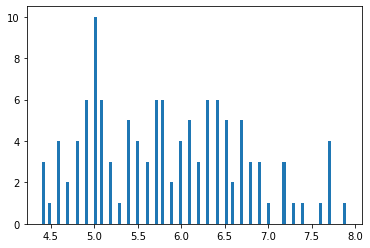

In [11]:
plt.hist(x[:,0], bins=100)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10, validation_split=0.2)

loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

Epoch 1/10
3/3 [==============================] - 1s 86ms/step - loss: 3.4487 - accuracy: 0.3256 - val_loss: 3.1297 - val_accuracy: 0.3636
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 3.2798 - accuracy: 0.3256 - val_loss: 2.9740 - val_accuracy: 0.3636
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 3.1059 - accuracy: 0.3256 - val_loss: 2.8211 - val_accuracy: 0.3636
Epoch 4/10
3/3 [==============================] - 0s 10ms/step - loss: 2.9338 - accuracy: 0.3256 - val_loss: 2.6644 - val_accuracy: 0.3636
Epoch 5/10
3/3 [==============================] - 0s 11ms/step - loss: 2.7636 - accuracy: 0.3256 - val_loss: 2.5066 - val_accuracy: 0.3636
Epoch 6/10
3/3 [==============================] - 0s 11ms/step - loss: 2.6018 - accuracy: 0.3256 - val_loss: 2.3509 - val_accuracy: 0.3636
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 2.4347 - accuracy: 0.3256 - val_loss: 2.2018 - val_accuracy: 0.3636
Epoch 8/10
3/3 [===========

## Normalization 적용

각 속성 별로 개별 데이터 이다. 각 컬럼 별로 해주어야 한다.

In [14]:
df_x = pd.DataFrame(iris_raw_x)
df_x_scaled = (df_x - df_x.min()) / (df_x.max() - df_x.min())
x = df_x_scaled.to_numpy()

y = iris_raw_y

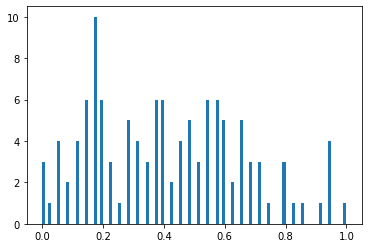

In [15]:
plt.hist(x[:,0], bins=100)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10, validation_split=0.2)

loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

Epoch 1/10
3/3 [==============================] - 1s 125ms/step - loss: 1.1513 - accuracy: 0.0116 - val_loss: 1.1387 - val_accuracy: 0.0455
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 1.1434 - accuracy: 0.0349 - val_loss: 1.1325 - val_accuracy: 0.0909
Epoch 3/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1356 - accuracy: 0.0465 - val_loss: 1.1266 - val_accuracy: 0.0909
Epoch 4/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1280 - accuracy: 0.1163 - val_loss: 1.1207 - val_accuracy: 0.0909
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 1.1203 - accuracy: 0.1512 - val_loss: 1.1147 - val_accuracy: 0.2273
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 1.1131 - accuracy: 0.1744 - val_loss: 1.1090 - val_accuracy: 0.3182
Epoch 7/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1055 - accuracy: 0.2093 - val_loss: 1.1033 - val_accuracy: 0.3182
Epoch 8/10
3/3 [==========

## Standardization 적용

column 별로 해주기 위해 pandas를 사용한다.


In [18]:
df_x = pd.DataFrame(iris_raw_x)
df_x_scaled = (df_x - df_x.mean()) / (df_x.std())
x = df_x_scaled.to_numpy()

y = iris_raw_y

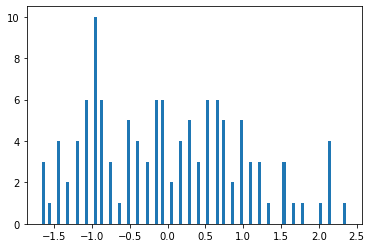

In [19]:
plt.hist(x[:,0], bins=100)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_x, train_y, epochs=10, validation_split=0.2)

loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

Epoch 1/10
3/3 [==============================] - 0s 74ms/step - loss: 1.0780 - accuracy: 0.4535 - val_loss: 1.0634 - val_accuracy: 0.4545
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 1.0595 - accuracy: 0.4535 - val_loss: 1.0447 - val_accuracy: 0.4545
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0448 - accuracy: 0.4767 - val_loss: 1.0276 - val_accuracy: 0.4545
Epoch 4/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0309 - accuracy: 0.4884 - val_loss: 1.0119 - val_accuracy: 0.4545
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0187 - accuracy: 0.4767 - val_loss: 0.9971 - val_accuracy: 0.4545
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0051 - accuracy: 0.4767 - val_loss: 0.9833 - val_accuracy: 0.4545
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 0.9935 - accuracy: 0.4535 - val_loss: 0.9700 - val_accuracy: 0.5455
Epoch 8/10
3/3 [===========

# 영상 데이터

## 아무것도 적용 하지 않은

In [22]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()


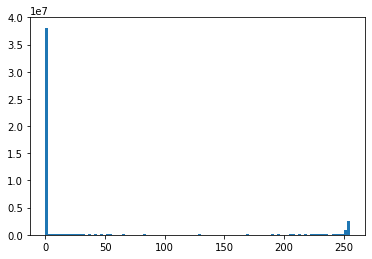

In [23]:
plt.hist(train_x.reshape((60000*28*28,)), bins=100)
plt.show()

In [24]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.6062 - accuracy: 0.1514
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.9148 - accuracy: 0.2634
Epoch 3/5
469/469 [==============================] -

## Normalization 적용

0 ~ 1 사이의 값으로 변경한다.

In [25]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

all_x = np.vstack([train_x, test_x])
max = np.max(all_x)
min = np.min(all_x)

train_x = (train_x - min) / (max - min)
test_x = (test_x - min) / (max - min)

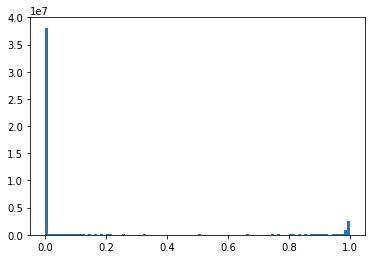

In [26]:
plt.hist(train_x.reshape((60000*28*28,)), bins=100)
plt.show()

In [27]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8325 - accuracy: 0.7479
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8884
Epoch 3/5
469/469 [==============================] -

## Standardization 적용

In [28]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

all_x = np.vstack([train_x, test_x])
mean = np.mean(all_x)
std = np.std(all_x)

train_x = (train_x - mean) / std
test_x = (test_x - mean) / std

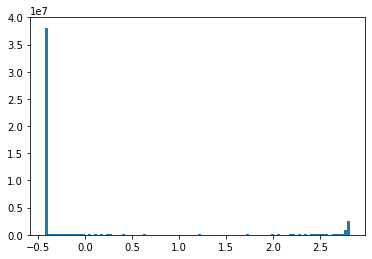

In [29]:
plt.hist(train_x.reshape((60000*28*28,)), bins=100)
plt.show()

In [30]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7579 - accuracy: 0.7571
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3089 - accuracy: 0.9115
Epoch 3/5
469/469 [==============================] -